In [12]:
from itertools import combinations
from tqdm import tqdm
import pandas as pd
import xmltodict
import networkx as nx
import collections
import matplotlib.pyplot as plt

In [2]:
def extract_authors(dc):
    if type(dc) == list:
        result = [
            i.get("#text").title().strip()
            for i in dc
            if i.get("#text") is not None and i.get("@scheme") != "institution"
        ]
        return [x for x in result if x != "And Others"]
    elif dc.get("#text") is not None and dc.get("@scheme") != "institution":
        return dc.get("#text").title().strip()


def get_edges(auth_list):
    return list(combinations(auth_list, 2))

def extract_ids(dc):
    if type(dc) == list:
        return [
            i.get("#text").upper().strip()
            for i in dc
            if i.get("#text") is not None and i.get("@scheme") == "eric_accno"
        ][0]
    elif dc.get("#text") is not None and dc.get("@scheme") == "eric_accno":
        return dc.get("#text").upper().strip()

In [3]:
df_all = []

for year in tqdm(range(1965, 2021)):
    file_name = "data/eric" + str(year)
    with open(file_name + ".xml", encoding="utf-8") as fd:
        dict = xmltodict.parse(fd.read())
    recs = [rec["metadata"] for rec in dict["records"]["record"]]
    df = pd.DataFrame(recs)
    df = df[df['dc:type'].notna()]
    df = df[df['eric:peer_reviewed'].notna()]
    df['type'] = [''.join(map(str, l)).lower() for l in df['dc:type']]
    df = df.loc[df['eric:peer_reviewed'] == 'T']
    # df = df[['ids', 'authors', 'edges', 'dc:type', 'dc:subject', 'eric:keywords', 'eric:keywords_geo', 'dc:title', 'eric:pageCount', 'dc:date', 'eric:dateAdded']]
    df_all.append(df)
df_all = pd.concat(df_all)

df_all = df_all.loc[(df_all['type'].str.contains("journal"))]
df_all["authors"] = df_all.apply(lambda row: extract_authors(row["dc:creator"]), axis=1)
df_all["ids"] = df_all.apply(lambda row: extract_ids(row["dc:identifier"]), axis=1)
df_all = df_all[df_all['authors'].notna()]
df_all["edges"] = df_all.apply(lambda row: get_edges(sorted(row["authors"])), axis=1)
df_all.info()

100%|██████████████████████████████████████████████████████████████████████████████████| 56/56 [20:04<00:00, 21.51s/it]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 908421 entries, 17594 to 44897
Data columns (total 39 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   dcterms:accessRights       908421 non-null  object
 1   dc:subject                 908417 non-null  object
 2   dc:creator                 908421 non-null  object
 3   dc:type                    908421 non-null  object
 4   eric:keywords              398883 non-null  object
 5   eric:keywords_geo          301814 non-null  object
 6   eric:issn                  746293 non-null  object
 7   dc:language                905402 non-null  object
 8   dcterms:educationLevel     326980 non-null  object
 9   dc:description             907932 non-null  object
 10  dc:identifier              908421 non-null  object
 11  dc:title                   908421 non-null  object
 12  dc:source                  908421 non-null  object
 13  eric:citation              908376 non-nul

In [ ]:
# df_all[['dc:date', 'eric:dateAdded']].to_csv("data/all.csv", encoding='utf-8', index=False)

In [ ]:
# df_all['eric:peer_reviewed'].value_counts()

2.3877839427250254

In [4]:
list1 = df_all["authors"].tolist()
list2 = [x for x in list1 if x is not None]  # remove none
node_list = [item for sublist in list2 for item in sublist]
node_list = list(set(node_list))

In [5]:
list1 = df_all["edges"].tolist()
list2 = [x for x in list1 if x is not None]  # remove none
edge_list = [item for sublist in list2 for item in sublist]

In [9]:
# mean papers per author
len([item for sublist in list2 for item in sublist])/len(node_list)

2.3877839427250254

In [10]:
G = nx.Graph()
G.add_nodes_from(node_list)
G.add_edges_from(edge_list)
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 824374\nNumber of edges: 1610204\nAverage degree:   3.9065'

In [15]:
nx.degree_histogram(G)

[147815,
 178475,
 123474,
 95470,
 68697,
 49373,
 33874,
 24736,
 18274,
 14393,
 10943,
 8335,
 6780,
 5578,
 4651,
 3786,
 3185,
 2837,
 2380,
 2025,
 1805,
 1492,
 1345,
 1165,
 1118,
 976,
 777,
 737,
 658,
 616,
 579,
 513,
 482,
 468,
 379,
 394,
 319,
 364,
 279,
 283,
 221,
 232,
 197,
 198,
 176,
 176,
 158,
 138,
 115,
 161,
 114,
 130,
 119,
 116,
 92,
 117,
 88,
 64,
 70,
 90,
 76,
 63,
 52,
 70,
 54,
 40,
 40,
 70,
 37,
 38,
 34,
 39,
 53,
 38,
 32,
 37,
 62,
 26,
 85,
 32,
 24,
 18,
 23,
 38,
 21,
 13,
 21,
 19,
 23,
 27,
 16,
 14,
 21,
 13,
 11,
 8,
 9,
 9,
 15,
 10,
 30,
 18,
 10,
 11,
 6,
 9,
 8,
 40,
 13,
 11,
 7,
 10,
 7,
 4,
 25,
 10,
 6,
 2,
 3,
 6,
 9,
 6,
 6,
 4,
 4,
 3,
 5,
 5,
 5,
 4,
 7,
 3,
 2,
 5,
 4,
 2,
 3,
 1,
 3,
 5,
 5,
 2,
 4,
 4,
 2,
 5,
 1,
 2,
 5,
 2,
 0,
 2,
 2,
 0,
 1,
 5,
 2,
 2,
 1,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 0,
 3,
 1,
 2,
 3,
 0,
 2,
 1,
 0,
 0,
 1,
 1,
 3,
 1,
 2,
 3,
 0,
 1,
 1,
 1,
 2,
 0,
 2,
 1,

In [ ]:
nx.write_edgelist(G, "all.edgelist.gz")

In [ ]:
# G = nx.read_edgelist("all.edgelist.gz")

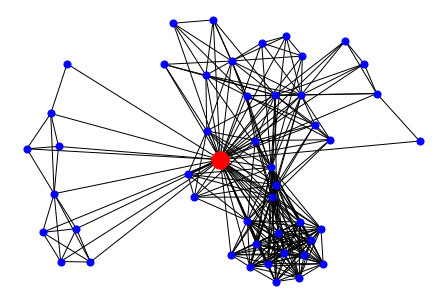

In [21]:
hub_ego = nx.ego_graph(G, "Loyalka, Prashant")
pos = nx.spring_layout(hub_ego)
nx.draw(hub_ego, pos, node_color="b", node_size=50, with_labels=False)
options = {"node_size": 300, "node_color": "r"}
nx.draw_networkx_nodes(hub_ego, pos, nodelist=["Loyalka, Prashant"], **options)

In [18]:
[s for s in node_list if "Loyalka" in s]

['Loyalka, Prashant K.', 'Loyalka, Prashant']